# Exercício 1

__Objetivos:__  As tarefas deste exercício são pensadas como um primeiro contato do estudante com programação para computação quântica utilizando a biblioteca qiskit. Particularmente, ao completar esta sequência de tarefas, o estudante será capaz de:

* Inicializar e importar as bibliotecas necessárias
* Escolher adequadamente um simulador local para executar o circuito a ser construído
* Construir um circuito quântico muito simples
* Visualizar dos resultados das medidas do circuito de diferentes maneiras
* Obter informação sobre a computação através dos resultados das medidas em um computador quântico.

__Avaliação__

Tão importante quanto escrever um código que funcione corretamente é escrever um código legível, que seja fácil de entender e possa ser facilmente reutilizado por outros ou por você mesmo. Por isso a avaliação é separada da seguinte forma:

* 60% conteúdo, se os resultados estão corretos.
* 40% apresentação, código bem comentado, cédulas texto bem escritas.

## Parte 1: Inicializado qiskit

### Tarefa 1:
 Usa a próxima célula de código para importar as bibliotecas básicas da Qiskit que são necessárias para construir, executar num simulador local e visualizar os resultados.



In [1]:
import numpy as np  # Pacote importante com definições matemáticas 
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram   # Pacote para visualização e representação 
import matplotlib.pyplot as plt     # Pacote para gerar plots
from qiskit import QuantumCircuit, Aer, execute     # Pacotes para utilização do Qiskit

### Tarefa 2:
Selecione um simulador apropriado para o circuito que vai construir.

In [2]:
qasm_sim = Aer.get_backend('qasm_simulator') 



## Parte 2: Seu primeiro q-bit

### Tarefa 3:
Considere o estado:

$$ |+\rangle = \frac{1}{\sqrt 2}(|0\rangle + |1\rangle) $$

Construa um circuito quântico que tenha o estado $ |+\rangle $ como saída. Obtenha o estado de saída da execução do circuito quântico no simulador e imprima sua representação em LaTeX e na esfera de Bloch.


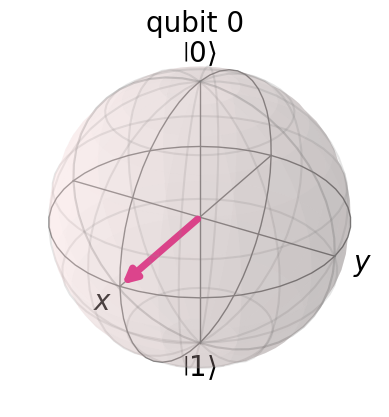

In [3]:
qubit = 1   # Quantidade de qubits que sera utilizado
bit = 1     # Quantidade de bits que sera utilizado
qc = QuantumCircuit(qubit, bit)     # Cria o circuito Quântico
qc.h(0)     # Aplica a Hadamard Gate
qc.save_statevector()   # Salva o vetor de estado

qc.measure(0,0)     # Coloca o medido no circuito, para medidas posteriores

resultado = qasm_sim.run(qc).result()   # Roda o qubit no simulador para obter o resultado
vetor = resultado.get_statevector()     # Converte em vetor de estado


plot_bloch_multivector(vetor)       #visualizando na esfera de bloch


In [24]:
vetor.draw('latex')     # Imprime o vetor no estilo latex

<IPython.core.display.Latex object>

### Tarefa 4: 
Do circuito da tarefa 3, obtenha a contagem de medidas na base computacional $ \{|0\rangle, |1\rangle \} $ e faça o histograma dos resultados.  

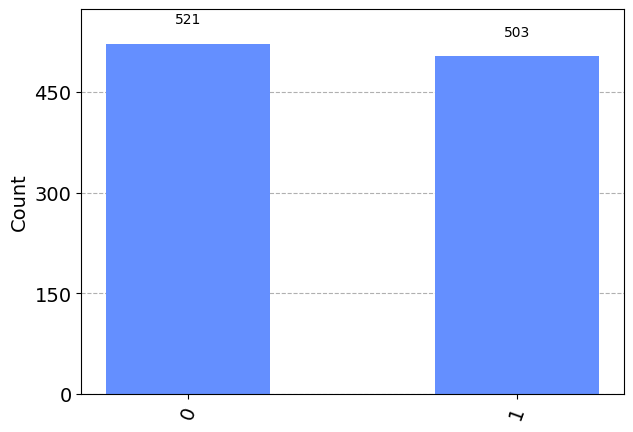

In [26]:
counts = resultado.get_counts(qc)

plot_histogram(counts)

### Tarefa 5
É possível deduzir que o estado de saída é o estado $ |+\rangle $ a partir das medidas da Tarefa 4? Explique.   

Não, pois os mesmo resultados podem ser obtido pelo o estado $\ket{-}$. Prova: crie um circuito que gere o estado $\ket{-}$ e faça as contagens de medida.

### Tarefa 6
Construa um novo circuito que gere o estado $ |+\rangle $ ou o estado $ |-\rangle$ aleatoriamente.

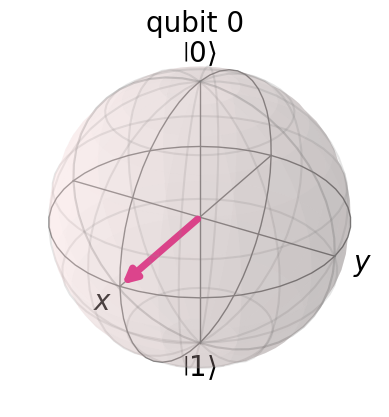

In [33]:
def quantum_coin_flipping():
    qc = QuantumCircuit(1,1)
    qc.h(0)
    qc.measure(0,0)

    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1).result()
    count = job.data(qc)
    if count['counts'].get('0x0') == True:
        return True
    else:
        return False

qc = QuantumCircuit(1)                              # build a circuit with the one qubit
if quantum_coin_flipping():                         # if the random number is greater than 0.5, append the hadamard gate in the circuit
    qc.h(0)                                         # build a |+> 

else:                                               # if the random number is not greater than 0.5
    qc.x(0)
    qc.h(0)                                         # build a |-> 

back_sv = Aer.get_backend('statevector_simulator')  # backend simulator for generator the statevector
result_sv = execute(qc, back_sv).result()           # to execute the statevector of circuit "qc"
qc_sv = result_sv.get_statevector(qc)               # stores the state vector
plot_bloch_multivector(qc_sv)                       # plot bloch sphere for visualization of the random state                                         # prints the state vector

# verify the key quantum state

# if qc_sv[1] > 0:
#     print(f'|+> = [{float(qc_sv[0])}, {float(qc_sv[1])}]')
# else:
#     print(f'|-> = [{float(qc_sv[0])}, {float(qc_sv[1])}]')

### Tarefa 7
Complete o circuito da Tarefa 6 fazendo com que o resultado da medida seja $|0\rangle$ se o estado gerado for $|+\rangle $, ou $|1\rangle$ se o estado gerado for $|-\rangle$. Imprima uma mensagem dizendo qual foi o estado gerado pelo circuito.

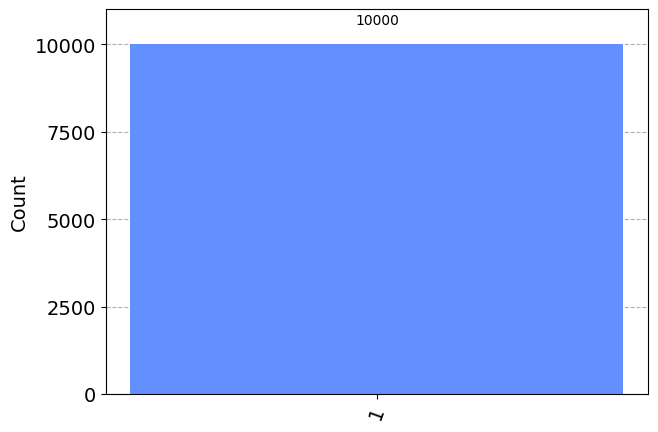

In [40]:
qc = QuantumCircuit(1,1)                              # build a circuit with the one qubit
if quantum_coin_flipping():                         # if the random number is greater than 0.5, append the hadamard gate in the circuit
    qc.h(0)                                         # build a |+> 

else:                                               # if the random number is not greater than 0.5
    qc.x(0)
    qc.h(0)                                         # build a |-> 

qc.h(0)                                             # add a hadamard gate to the circuit for return a state of |1> or |0>
qc.measure(0,0)
 
job = execute(qc, backend=qasm_sim, shots=10000)

result_sim = job.result()
counts = result_sim.get_counts(qc)
plot_histogram(counts)